**<font color = 'blue' size = 38>DATA ANALYSIS & VISUALIZATION</font>**

# <font color = "Orange">Code from Exercise 2</font>

In [1]:
# Import all modules that are required
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
def get_data(url):
  snapshot_url = url
  snapshot = requests.get(snapshot_url)
  soup = BeautifulSoup(snapshot.text,'html.parser')
  card_titles = soup.select('.Card-title')
  card_times = soup.select('.Card-time')
  card_classes = soup.select('.Card-eyebrow')
  matrix = []
  class_url = url.split('/')[-2]
  for i in range(0,len(card_titles)):
    d = card_times[i].text
    date_list=[]
    if 'Ago' in d or 'min' in d or 'sec' in d or 'hour' in d:
      today = date.today()
      date_list=[today.day,today.month]
    else:
      pom = d.split(' ')
      date_list = [int(pom[2][:-2]),datetime.strptime(pom[1],'%b').month]
    redica = [card_titles[i].select_one('div').text,card_times[i].text,date_list[0],date_list[1]]
    if i<5:
      redica.append('Top news ' +  class_url)
    else:
      if(class_url=='finance'):
        redica.append(card_classes[i-6].select_one('div').text)
      else:
        redica.append(card_classes[i-5].select_one('div').text)
    matrix.append(redica)
  df = pd.DataFrame(np.array(matrix),columns = ['Title','Date','Day','Month','Class'])
  return df
    

In [20]:
df_finance = get_data('https://www.cnbc.com/finance/')

In [21]:
df_health = get_data('https://www.cnbc.com/health-and-science/')

In [22]:
df_finance

,Title,Date,Day,Month,Class
0,Stock futures are on hold ahead of October job...,38 min ago,4,11,Top news finance
1,Stocks making the biggest moves after hours: P...,an hour ago,4,11,Top news finance
2,Stocks making the biggest moves midday: Modern...,3 hours ago,4,11,Top news finance
3,Bank of England's Bailey says 'the warning sig...,5 hours ago,4,11,Top news finance
4,Democrats put 401(k) and IRA restrictions back...,5 hours ago,4,11,Top news finance
5,Watch Governor Andrew Bailey speak after the B...,"Thu, Nov 4th 2021",4,11,Trading Nation
6,Bank of England surprises markets by holding r...,5 hours ago,4,11,Central Banks
7,Stocks making the biggest moves premarket: Reg...,"Thu, Nov 4th 2021",4,11,Central Banks
8,DeFi — the ‘Wild West’ of crypto — is next on ...,"Thu, Nov 4th 2021",4,11,Market Insider
9,JPMorgan picks 12 Asian stocks with ‘superior’...,"Wed, Nov 3rd 2021",3,11,Tech


In [23]:
df_health

,Title,Date,Day,Month,Class
0,Several big business groups aren't happy with ...,10 min ago,4,11,Top news health-and-science
1,Fauci says Paul 'egregiously incorrect' about ...,43 min ago,4,11,Top news health-and-science
2,Cramer says Moderna's stumbles highlight risks...,3 hours ago,4,11,Top news health-and-science
3,WHO warns that Europe is once again at the epi...,"Thu, Nov 4th 2021",4,11,Top news health-and-science
4,"Watch live: Fauci, CDC's Walensky and others t...","Thu, Nov 4th 2021",4,11,Top news health-and-science
5,Holmes said she was decision maker at Theranos...,6 hours ago,4,11,Tech
6,Businesses have until after the holidays to im...,2 hours ago,4,11,Health and Science
7,Moderna shares fall after company cuts 2021 fo...,4 hours ago,4,11,Health and Science
8,"Merck's Covid pill approved by UK, a potential...","Thu, Nov 4th 2021",4,11,Health and Science
9,"Biden: Covid shots for kids, boosters for adul...","Wed, Nov 3rd 2021",3,11,Health and Science


#<font color = 'orange'> Save and read .CSV </font>


In [24]:
df_finance.to_csv("/content/drive/My Drive/dataset_finance.csv",index = False)

In [25]:
df_health.to_csv("/content/drive/My Drive/dataset_health.csv", index = False)

In [26]:
df_finance = pd.read_csv('/content/drive/My Drive/dataset_finance.csv')

In [27]:
df_health = pd.read_csv('/content/drive/My Drive/dataset_health.csv')

In [28]:
df_finance

,Title,Date,Day,Month,Class
0,Stock futures are on hold ahead of October job...,38 min ago,4,11,Top news finance
1,Stocks making the biggest moves after hours: P...,an hour ago,4,11,Top news finance
2,Stocks making the biggest moves midday: Modern...,3 hours ago,4,11,Top news finance
3,Bank of England's Bailey says 'the warning sig...,5 hours ago,4,11,Top news finance
4,Democrats put 401(k) and IRA restrictions back...,5 hours ago,4,11,Top news finance
5,Watch Governor Andrew Bailey speak after the B...,"Thu, Nov 4th 2021",4,11,Trading Nation
6,Bank of England surprises markets by holding r...,5 hours ago,4,11,Central Banks
7,Stocks making the biggest moves premarket: Reg...,"Thu, Nov 4th 2021",4,11,Central Banks
8,DeFi — the ‘Wild West’ of crypto — is next on ...,"Thu, Nov 4th 2021",4,11,Market Insider
9,JPMorgan picks 12 Asian stocks with ‘superior’...,"Wed, Nov 3rd 2021",3,11,Tech


# <font color = 'orange'> Some quick EDA</font>

In [29]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   Date    34 non-null     object
 2   Day     34 non-null     int64 
 3   Month   34 non-null     int64 
 4   Class   34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [30]:
df_finance.head()


,Title,Date,Day,Month,Class
0,Stock futures are on hold ahead of October job...,38 min ago,4,11,Top news finance
1,Stocks making the biggest moves after hours: P...,an hour ago,4,11,Top news finance
2,Stocks making the biggest moves midday: Modern...,3 hours ago,4,11,Top news finance
3,Bank of England's Bailey says 'the warning sig...,5 hours ago,4,11,Top news finance
4,Democrats put 401(k) and IRA restrictions back...,5 hours ago,4,11,Top news finance


In [31]:
df_top_news= df_finance[df_finance.Class == 'Top News finance']
df_top_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   0 non-null      object
 1   Date    0 non-null      object
 2   Day     0 non-null      int64 
 3   Month   0 non-null      int64 
 4   Class   0 non-null      object
dtypes: int64(2), object(3)
memory usage: 0.0+ bytes


In [32]:
df_top_news.sort_values('Day').head()


,Title,Date,Day,Month,Class


In [33]:
df = pd.concat([df_finance,df_health],ignore_index=True)
df

,Title,Date,Day,Month,Class
0,Stock futures are on hold ahead of October job...,38 min ago,4,11,Top news finance
1,Stocks making the biggest moves after hours: P...,an hour ago,4,11,Top news finance
2,Stocks making the biggest moves midday: Modern...,3 hours ago,4,11,Top news finance
3,Bank of England's Bailey says 'the warning sig...,5 hours ago,4,11,Top news finance
4,Democrats put 401(k) and IRA restrictions back...,5 hours ago,4,11,Top news finance
...,...,...,...,...,...
63,Here are the 3 big ways Democrats’ social plan...,"Sat, Oct 30th 2021",30,10,Personal Finance
64,U.S. Covid cases fall to less than half of pea...,"Sat, Oct 30th 2021",30,10,Health and Science
65,Supreme Court declines to block vaccine mandat...,"Fri, Oct 29th 2021",29,10,Health and Science
66,FDA clears Pfizer's Covid vaccine for kids 5 t...,"Fri, Oct 29th 2021",29,10,Health and Science


In [34]:
df.to_csv('/content/drive/My Drive/dataset_exercise3.csv', index=False)

In [35]:
df = pd.read_csv('/content/drive/My Drive/dataset_exercise3.csv')

In [36]:
df

,Title,Date,Day,Month,Class
0,Stock futures are on hold ahead of October job...,38 min ago,4,11,Top news finance
1,Stocks making the biggest moves after hours: P...,an hour ago,4,11,Top news finance
2,Stocks making the biggest moves midday: Modern...,3 hours ago,4,11,Top news finance
3,Bank of England's Bailey says 'the warning sig...,5 hours ago,4,11,Top news finance
4,Democrats put 401(k) and IRA restrictions back...,5 hours ago,4,11,Top news finance
...,...,...,...,...,...
63,Here are the 3 big ways Democrats’ social plan...,"Sat, Oct 30th 2021",30,10,Personal Finance
64,U.S. Covid cases fall to less than half of pea...,"Sat, Oct 30th 2021",30,10,Health and Science
65,Supreme Court declines to block vaccine mandat...,"Fri, Oct 29th 2021",29,10,Health and Science
66,FDA clears Pfizer's Covid vaccine for kids 5 t...,"Fri, Oct 29th 2021",29,10,Health and Science


## <font color ='Orange'> Continuous variables</font>

In [37]:
df_health.median()

Day       3.0
Month    11.0
dtype: float64

In [38]:
df_health['Day'].median()

3.0

In [39]:
df_finance.median()

Day       3.0
Month    11.0
dtype: float64

In [40]:
df.median()

Day       3.0
Month    11.0
dtype: float64

In [41]:
df.std()

Day      7.747143
Month    0.285746
dtype: float64

In [42]:
df.min()

Title    'Absolutely bullish': Why PNC sees the growth ...
Date                                            10 min ago
Day                                                      1
Month                                                   10
Class                                                Autos
dtype: object

In [43]:
df.max()

Title    Wells Fargo warns that the bank is likely to f...
Date                                           an hour ago
Day                                                     31
Month                                                   11
Class                                       Trading Nation
dtype: object

In [44]:
df.quantile([.1, .25, .5, .75], axis = 0) 


,Day,Month
0.10,1.0,11.0
0.25,2.0,11.0
0.50,3.0,11.0
0.75,4.0,11.0


In [45]:
#Geometric Mean of the column in dataframe

from scipy import stats

stats.gmean(df.iloc[:,2:4],axis=0)


array([ 3.17327983, 10.90788095])

## <font color='Orange'> Categorical variables</font>

In [46]:
df_finance.Class.value_counts()

Market Insider           6
Top news finance         5
China Economy            3
Central Banks            3
Federal Reserve          3
Trading Nation           3
Personal Finance         3
Tech                     2
Delivering Alpha 2021    2
Finance                  1
Markets                  1
Politics                 1
Climate                  1
Name: Class, dtype: int64

In [47]:
df_health.Class.value_counts()

Health and Science             17
Top news health-and-science     5
Personal Finance                3
Politics                        3
CNBC Travel                     2
Tech                            2
Retail                          1
Autos                           1
Name: Class, dtype: int64

In [48]:
df.Class.value_counts()

Health and Science             17
Personal Finance                6
Market Insider                  6
Top news finance                5
Top news health-and-science     5
Tech                            4
Politics                        4
Federal Reserve                 3
Trading Nation                  3
Central Banks                   3
China Economy                   3
CNBC Travel                     2
Delivering Alpha 2021           2
Retail                          1
Markets                         1
Autos                           1
Climate                         1
Finance                         1
Name: Class, dtype: int64

# <font color = 'Orange'>Data visualization</font>

## <font color ='Orange'> Distribution</font>

In [49]:
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

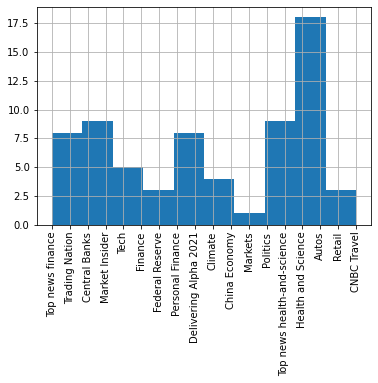

In [50]:
df['Class'].hist()
plt.xticks(rotation = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff66ee02610>,
      dtype=object)

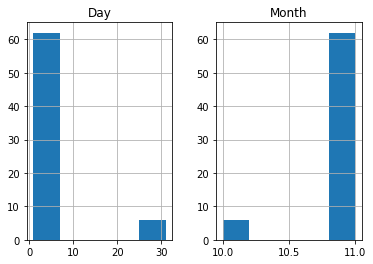

In [51]:
df.hist(bins = 5)

<Figure size 432x288 with 0 Axes>

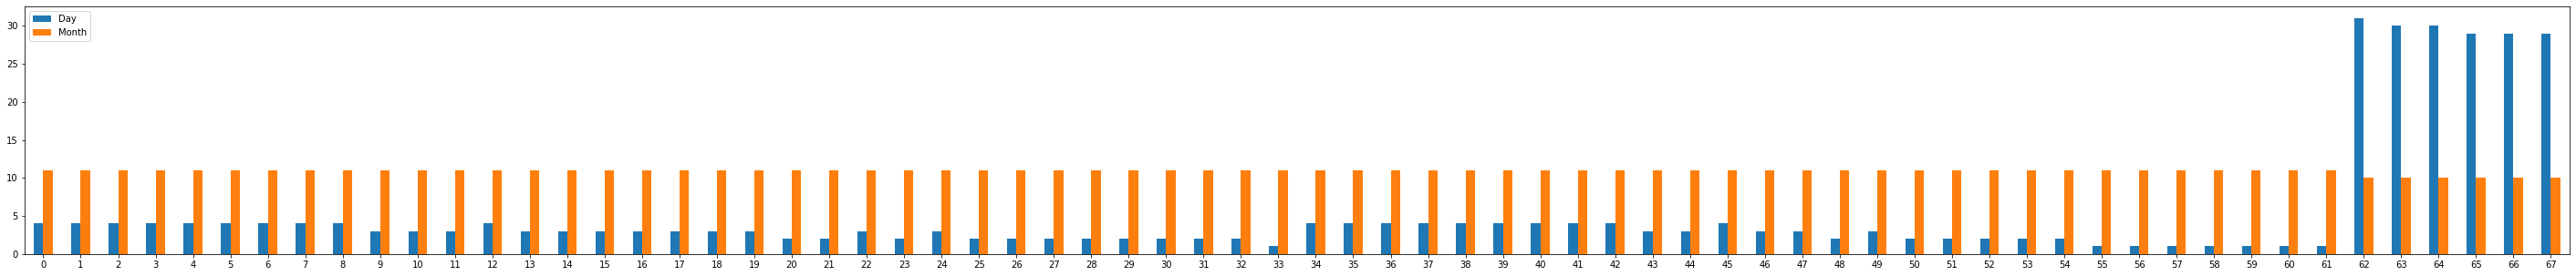

In [52]:
fig = plt.figure()
df.plot.bar(rot=0,figsize=(50,5))
fig.show()

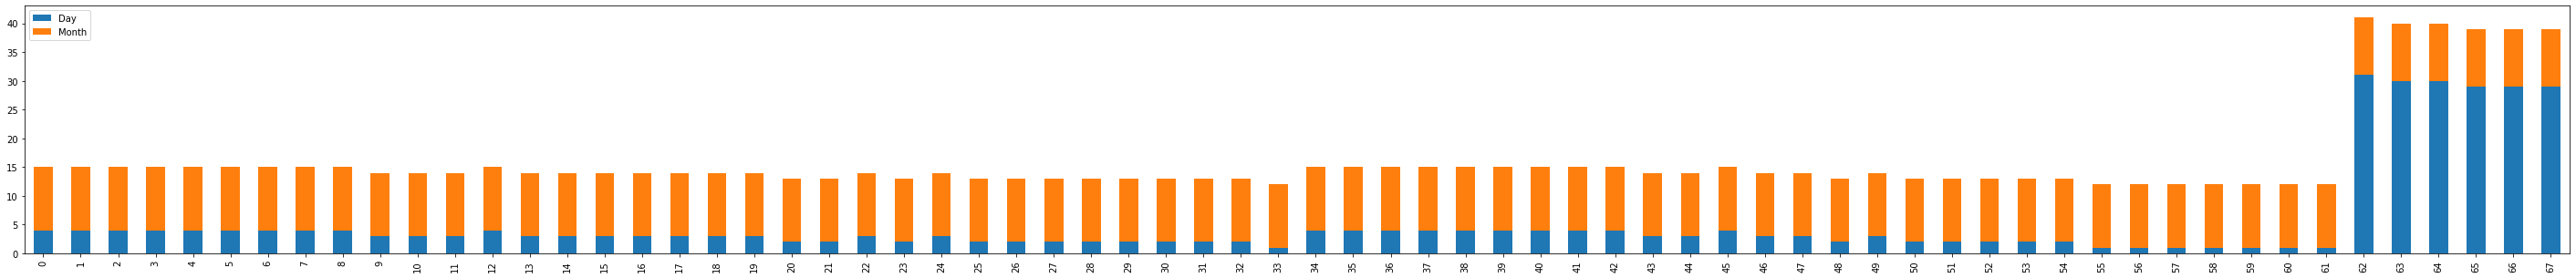

In [53]:
 df.plot.bar(stacked=True,figsize=(50,5))

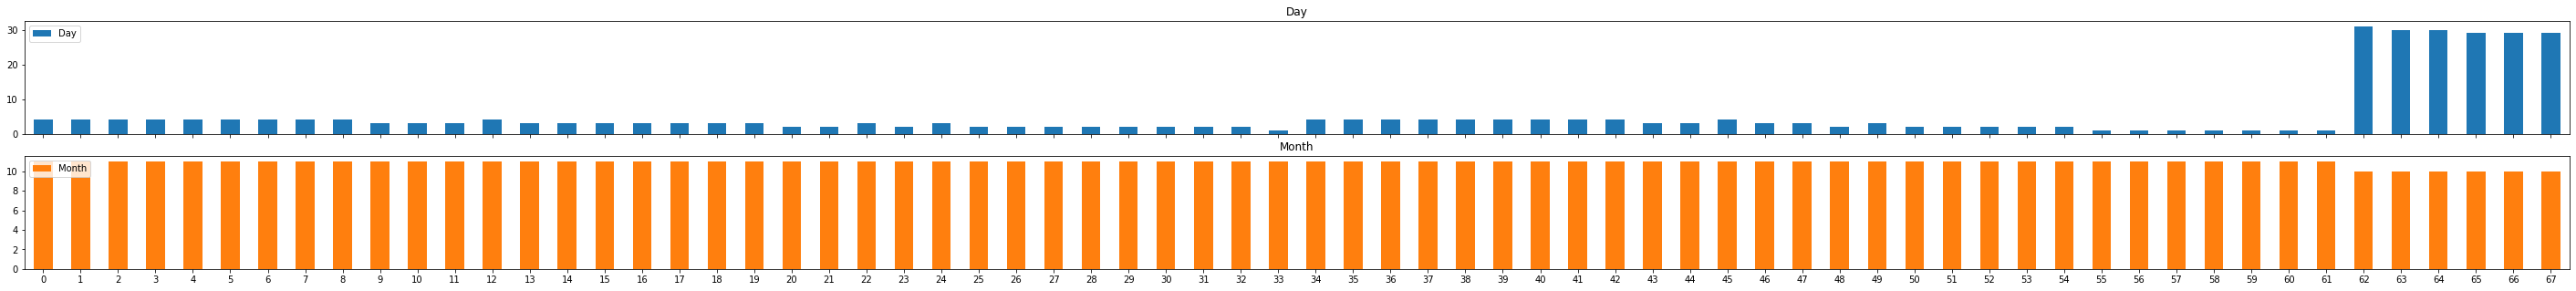

In [54]:
axes = df.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

## <font color = 'Orange'>Show trend over time </font>

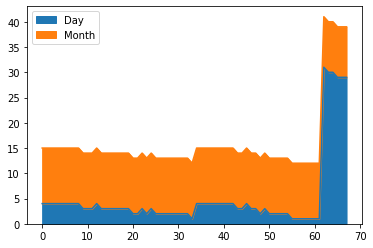

In [55]:
df.plot.area()

## <font color = 'Orange'>Relationship</font>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

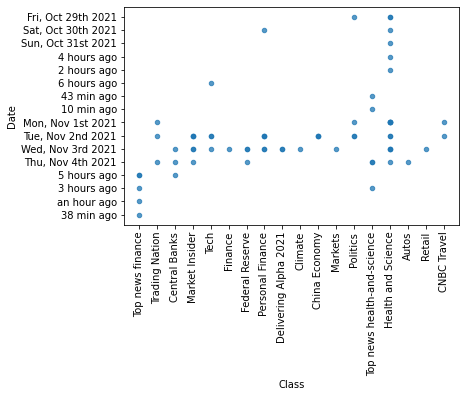

In [56]:
fig = plt.figure()
df.plot.scatter(x= 'Class', y = 'Date', alpha = 0.75,rot=0)
plt.xticks(rotation=90)



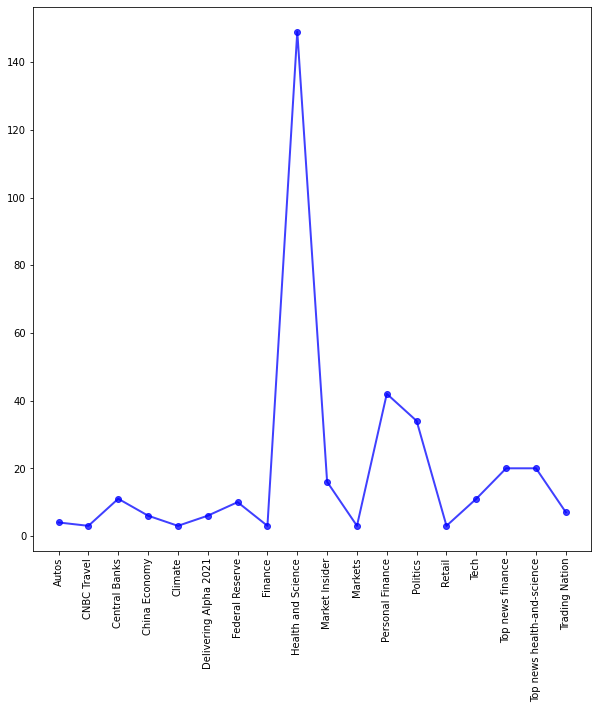

In [57]:
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=[10,10])
plt.plot(df.groupby('Class').Day.sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

## <font color = 'Orange'>Comparison</font>

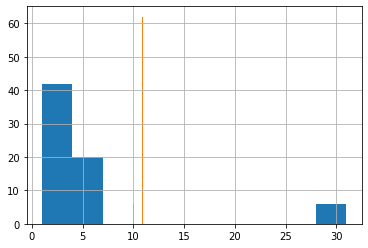

In [58]:
df['Day'].hist()
df['Month'].hist()

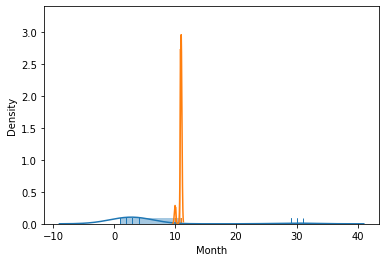

In [59]:
import seaborn as sns
line_up=sns.distplot(df['Day'], bins=3, kde=True, rug=True,label='Day')

line_down=sns.distplot(df['Month'], bins=3, kde=True, rug=True,label = 'Month')

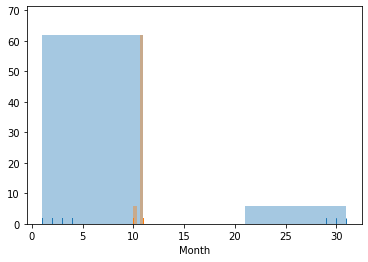

In [60]:
import seaborn as sns
line_up=sns.distplot(df['Day'], bins=3, kde=False, rug=True,label='Day')

line_down=sns.distplot(df['Month'], bins=3, kde=False, rug=True,label = 'Month')

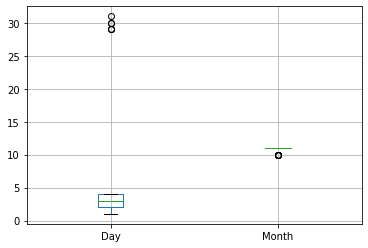

In [61]:
boxplot = df.boxplot(column=['Day', 'Month'])

# <font color = 'Orange'> Kaggle dataset visualization</font>

In [62]:
import pandas as pd
#add the files on your Google Drive or change the path for the training and testing dataset
train = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-03/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-03/test_data.csv')
train = train.drop(['case_id'], axis=1)
test = test.drop(['case_id'], axis=1)
train['dataset'] = 'train'
test['dataset'] = 'test'
df = pd.concat([train, test])

In [63]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


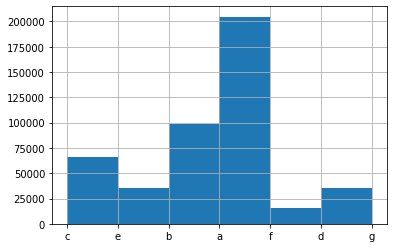

In [64]:
df['Hospital_type_code'].hist(bins = 6)

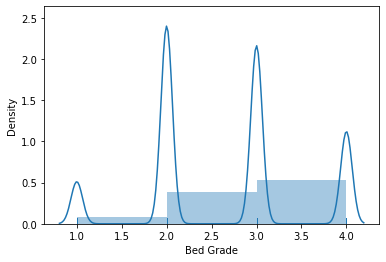

In [65]:
import seaborn as sns
line_up=sns.distplot(df['Bed Grade'], bins=3, kde=True, rug=True)


In [66]:
ds = df.groupby(['Department','Bed Grade'])['patientid'].count().reset_index()
ds.columns = ['Department','Bed Grade', 'count']


In [67]:
ds

,Department,Bed Grade,count
0,TB & Chest disease,1.0,773
1,TB & Chest disease,2.0,4880
2,TB & Chest disease,3.0,5151
3,TB & Chest disease,4.0,2944
4,anesthesia,1.0,452
5,anesthesia,2.0,10068
6,anesthesia,3.0,20163
7,anesthesia,4.0,11673
8,gynecology,1.0,32168
9,gynecology,2.0,144816


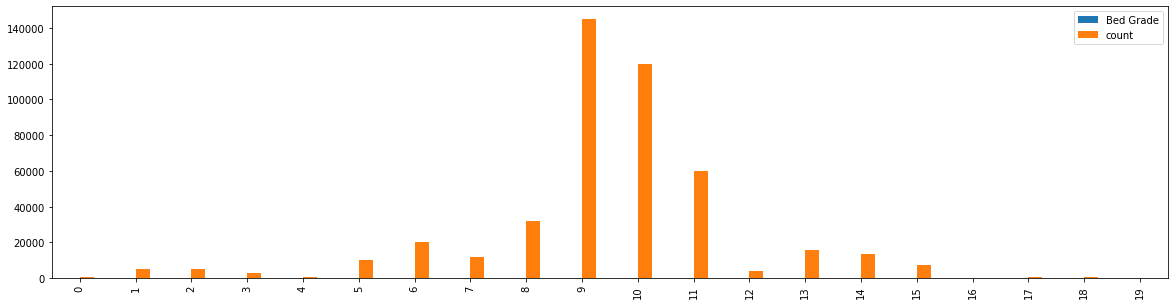

In [68]:
ds.plot.bar(figsize=(20,5))

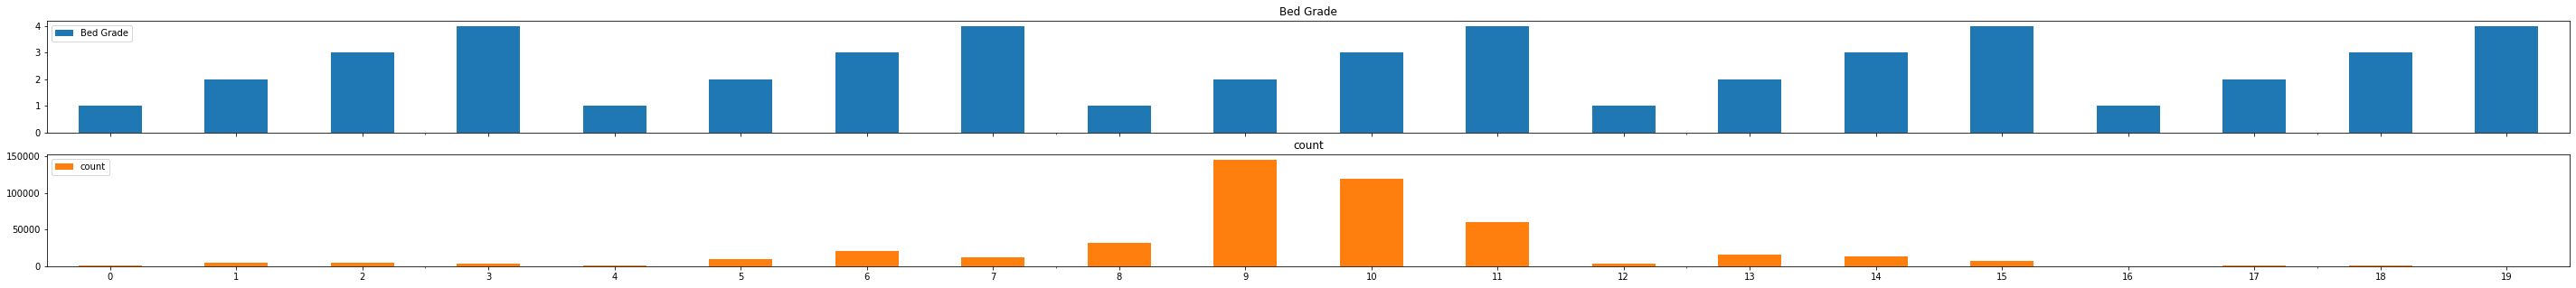

In [69]:
axes = ds.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

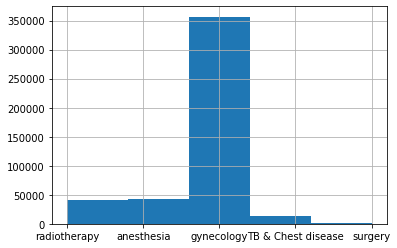

In [70]:
df['Department'].hist(bins = 5)

In [71]:
import plotly.express as px

fig = px.bar(
    ds, 
    x='Department', 
    y="count", 
    color = 'Bed Grade',
    barmode='group',
    orientation='v', 
    title='Cases per department distribution', 
    width=800,
    height=700
)
fig.show()


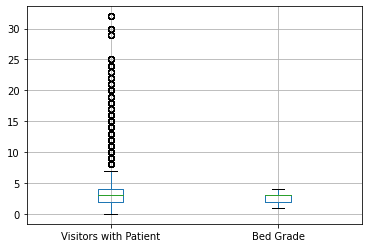

In [72]:
boxplot = df.boxplot(column=['Visitors with Patient', 'Bed Grade'])

In [73]:
ds = df.groupby(['Department','Age'])['patientid'].count().reset_index()
ds.columns = ['Department','Age', 'count']

In [74]:
ds

,Department,Age,count
0,TB & Chest disease,0-10,602
1,TB & Chest disease,11-20,998
2,TB & Chest disease,21-30,1809
3,TB & Chest disease,31-40,2144
4,TB & Chest disease,41-50,2470
5,TB & Chest disease,51-60,2708
6,TB & Chest disease,61-70,1884
7,TB & Chest disease,71-80,964
8,TB & Chest disease,81-90,116
9,TB & Chest disease,91-100,56


In [75]:
import plotly.express as px

fig = px.bar(
    ds, 
    x='Department', 
    y="count", 
    color = 'Age',
    barmode='group',
    orientation='v', 
    title='Cases per age distribution', 
    width=800,
    height=700
)
fig.show()

In [76]:
ds = df.groupby(['Age','dataset'])['patientid'].count().reset_index()
ds.columns = ['Age','dataset', 'count']

In [77]:
import plotly.express as px

fig = px.bar(
    ds, 
    x='Age', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Cases per age distribution', 
    width=800,
    height=700
)
fig.show()

In [78]:
ds = df.groupby(['Age','Severity of Illness'])['patientid'].count().reset_index()
ds.columns = ['Age','Severity of Illness', 'count']

In [79]:
import plotly.express as px

fig = px.bar(
    ds, 
    x='Age', 
    y="count", 
    color = 'Severity of Illness',
    barmode='group',
    orientation='v', 
    title='Cases per age distribution', 
    width=800,
    height=700
)
fig.show()